In [1]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline
reviews = pd.read_csv("./reviews/reviews_2019_10_26.csv")

reviews.head()

,review_id,title,author,author_url,version,rating,review,vote_count
0,5017388045,Where is the back up?,Rxxxxxy,https://itunes.apple.com/us/reviews/id261062508,5.3.7,1,This app might be #2 on productivity list but ...,0
1,5016693553,Missing Crucial Features,Sunny해,https://itunes.apple.com/us/reviews/id532346922,5.3.7,2,Missing Features Present in Older Version:\n- ...,0
2,5016515381,PowerPoint presenter notes,Ryan Padilla,https://itunes.apple.com/us/reviews/id303681667,5.3.7,1,"I love this app, but I’m being forced to use k...",0
3,5016042453,Still no upload to One Drive,Olney65,https://itunes.apple.com/us/reviews/id461825605,5.3.7,1,This is a step backwards from GN4,0
4,5015876232,Good app... if it worked,RocGirl72,https://itunes.apple.com/us/reviews/id226862466,5.3.7,1,I’m a new user of Good Notes. When I first dow...,0


What is the most frequent word in the title of review and content ?



In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

title_series = reviews.title
split_title_series = pd.Series(tokenizer.tokenize("|".join(title_series).lower()))

split_title_series.value_counts().to_csv("title_frequency.csv", header = False)

review_series = reviews.review
split_review_series = pd.Series(tokenizer.tokenize("|".join(review_series).lower()))

split_review_series.value_counts().to_csv("reviews_frequency.csv", header = False)
# review_series = reviews.review
# pd.Series(title_series.append(review_series))


In [3]:
text = " ".join(split_review_series)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 156850 words in the combination of all review.


In [8]:
stopwords = set(STOPWORDS)
stopwords.update(set(['goodnotes', 'goodnote', 'note', 'notes', 'app']))
print(stopwords)

{'and', "couldn't", 'k', "they'll", 'once', 'up', 'some', 'for', 'ourselves', 'also', 'had', "you've", 'or', 'since', 'her', 'below', 'each', 'herself', 'again', "i've", 'http', "hadn't", 'when', 'i', 'as', "it's", 'those', 'an', "haven't", 'by', 'very', 'your', 'yourselves', "hasn't", 'itself', 'more', 'on', 'through', 'he', "we've", 'while', 'was', 'can', 'they', "won't", "you'd", 'other', 'she', 'we', 'down', 'there', 'own', 'did', 'off', "isn't", 'themselves', 'otherwise', "he'll", 'its', 'have', 'such', "he'd", 'me', 'before', 'am', "she'd", "why's", "mustn't", 'notes', 'him', "i'll", 'are', "they'd", 'nor', 'too', 'com', 'ought', "we're", "we'll", 'should', 'note', "shouldn't", "she's", 'them', 'than', 'our', 'in', "didn't", 'over', 'doing', 'would', "shan't", 'this', 'whom', "doesn't", 'from', 'a', 'no', "what's", 'cannot', "she'll", 'yours', 'be', 'further', 'goodnotes', "they're", 'under', 'who', 'during', "how's", 'until', "there's", "who's", 'hers', 'shall', 'how', "i'm", "h

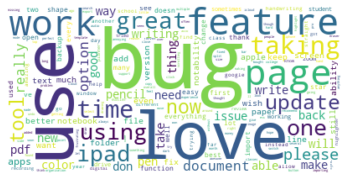

In [9]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
text2 = " ".join(split_title_series)
print ("There are {} words in the combination of all titles.".format(len(text2)))

There are 12099 words in the combination of all titles.


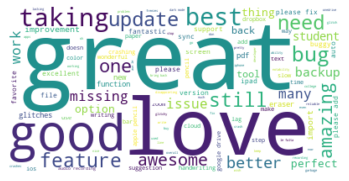

In [10]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()